In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita', 'vf']

In [6]:
gdp_df = gdp_df.drop(columns=['vf'])

In [7]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
gdp_df.head(50)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

(array([5.124e+03, 1.053e+03, 8.830e+02, 3.490e+02, 1.270e+02, 6.100e+01,
        3.500e+01, 2.500e+01, 2.000e+00, 3.000e+00]),
 array([   436.37641563,  16152.98702866,  31869.59764169,  47586.20825471,
         63302.81886774,  79019.42948077,  94736.04009379, 110452.65070682,
        126169.26131985, 141885.87193287, 157602.4825459 ]),
 <BarContainer object of 10 artists>)

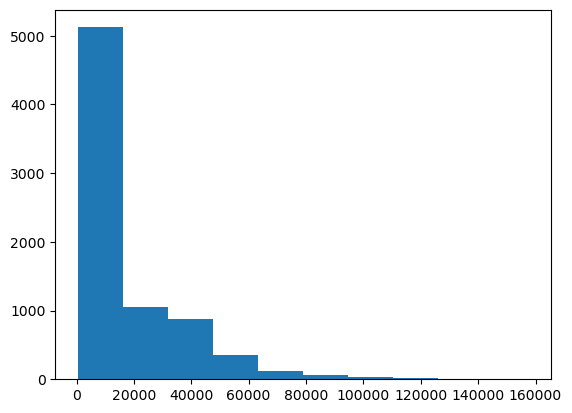

In [9]:
plt.hist(gdp_df.GDP_Per_Capita)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

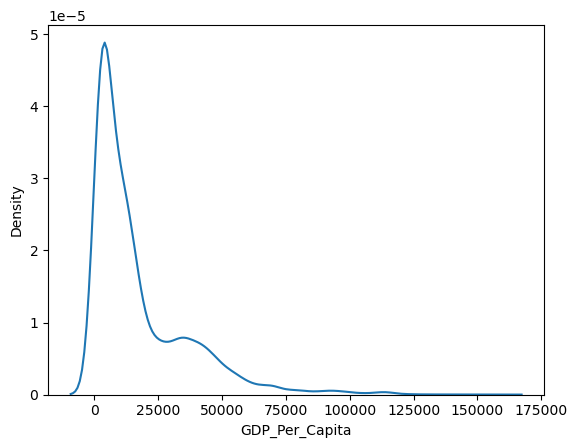

In [10]:
sns.kdeplot(gdp_df.GDP_Per_Capita)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a64f36ff90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a653f86b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a653f846d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a653f87f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a64f36d810>],
 'means': []}

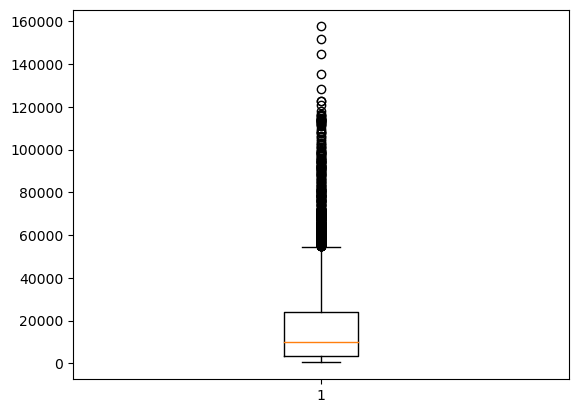

In [11]:
plt.boxplot(gdp_df.GDP_Per_Capita)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a64f37d2d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a653fa2990>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a653febe10>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a64f344a50>}

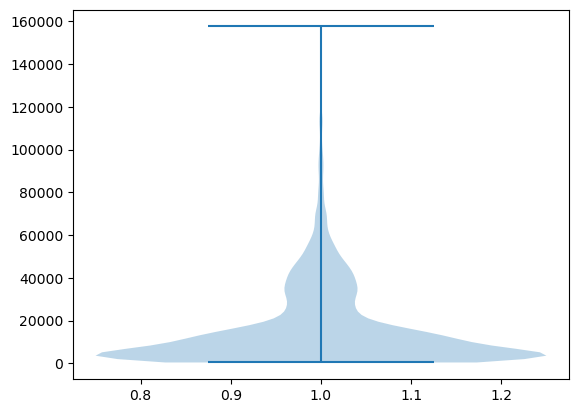

In [12]:
plt.violinplot(gdp_df.GDP_Per_Capita)

9. What was the median GDP per capita value in 2020?

In [13]:
gdp_df['GDP_Per_Capita'].median()

10132.449293179425

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [14]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

In [15]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


{'whiskers': [<matplotlib.lines.Line2D at 0x1a64f418a50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a654084150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a654079d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a654085790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a654086210>],
 'means': []}

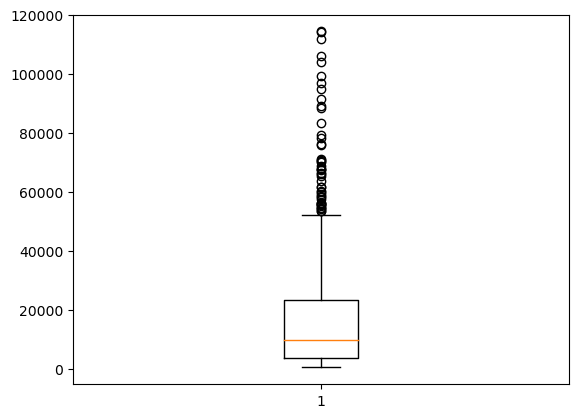

In [16]:
plt.boxplot(gdp_decades.GDP_Per_Capita)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

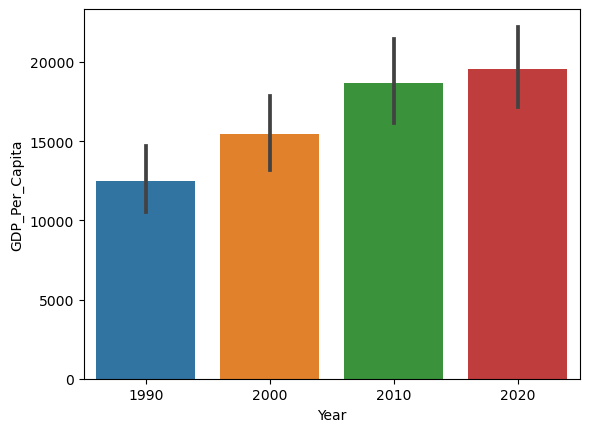

In [17]:
sns.barplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita)

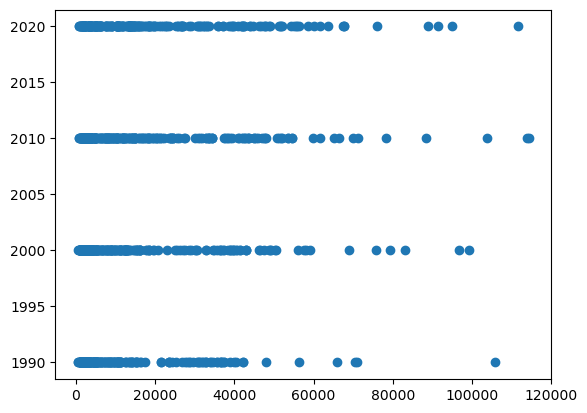

In [18]:
plt.scatter(gdp_decades.GDP_Per_Capita, gdp_decades.Year)

<Axes: >

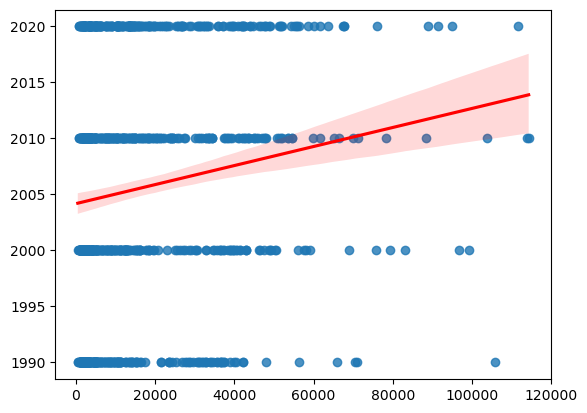

In [19]:
sns.regplot(x=[gdp_decades.GDP_Per_Capita], y=[gdp_decades.Year], line_kws ={"color":"r"})

INSERT COMMENT mo' time, mo' money, mo' problems?

11. Which country was the first to have a GDP per capita greater than $100,000?

In [20]:
gdp_dfgreat = gdp_df[gdp_df['GDP_Per_Capita']>=100000].sort_values('Year').head(1)

In [21]:
gdp_dfgreat.head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [22]:
gdp_df2020R= gdp_df[gdp_df['Year']==2020].sort_values('GDP_Per_Capita', ascending=False)

In [23]:
gdp_df2020R.head(1)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 
**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [24]:
gdp_df2020P= gdp_df[gdp_df['Year']==2020].sort_values('GDP_Per_Capita', ascending=True)

In [25]:
gdp_df2020P.head(1)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [26]:
gdp_df_burundi = gdp_df[gdp_df['Country']=='Burundi']

In [27]:
gdp_df_burundi

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


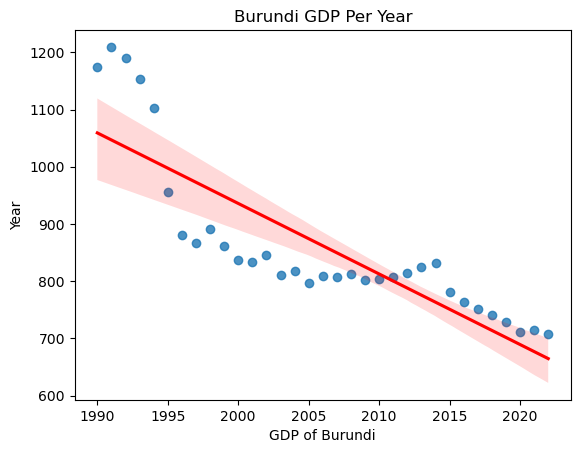

In [28]:
sns.regplot(x=[gdp_df_burundi.Year], y=[gdp_df_burundi.GDP_Per_Capita], line_kws ={"color":"r"})
plt.title("Burundi GDP Per Year")
plt.xlabel("GDP of Burundi")
plt.ylabel("Year")
plt.show()

 Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?